In [ ]:
"""
Need to explicitly install matplotlib > 3.7.3 because
of unrelated warning during plotting some graphs
"""
%pip install --upgrade matplotlib==3.10.0

  Obtaining dependency information for matplotlib==3.10.0 from https://files.pythonhosted.org/packages/c7/8b/92e9da1f28310a1f6572b5c55097b0c0ceb5e27486d85fb73b54f5a9b939/matplotlib-3.10.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 34.6 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.2
    Uninstalling matplotlib-3.7.2:
      Successfully uninstalled matplotlib-3.7.2
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set Seaborn theme for better aesthetics
sns.set_theme(style="whitegrid", palette="pastel")

# Load the dataset
file_path ='/Users/Sayali/Desktop/ALY6140/Final_Project/train1.csv'
df = pd.read_csv(file_path)

# Display initial information
print("Initial Dataset Info:")
df.info()

# Check for missing values
print("\nMissing Values Before Cleaning:")
print(df.isnull().sum())

# Handle missing values by filling or dropping (drop rows with more than 50% NaNs)
df = df.dropna(thresh=len(df.columns) * 0.5)  # Keep rows with at least 50% non-NaN
df.fillna(df.mean(numeric_only=True), inplace=True)  # Fill numerical NaNs with mean

# Convert appropriate columns (e.g., satisfaction to category if not already)
if df['satisfaction'].dtype == 'object':
    df['satisfaction'] = df['satisfaction'].astype('category')

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Handle outliers using IQR method
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

print("\nDataset Info After Cleaning:")
df.info()

# Save the cleaned dataset for future use
cleaned_file_path = file_path.replace('train1.csv', 'cleaned_train1.csv')
df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved to: {cleaned_file_path}")


Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location    

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
cleaned_file_path ='/Users/Sayali/Desktop/ALY6140/Final_Project/train1.csv'
df = pd.read_csv(cleaned_file_path)

# Display basic dataset information
print("Dataset Overview:")
print(df.info())
print("\nDataset Description:")
print(df.describe())

# Handle missing values (if any)
print("\nMissing Values:")
print(df.isnull().sum())
df.fillna(df.median(numeric_only=True), inplace=True)  # Filling missing numeric values with median

# Identify categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
print(f"\nCategorical Columns: {list(categorical_columns)}")

# Check unique values in categorical columns
for col in categorical_columns:
    print(f"{col} unique values: {df[col].unique()}")



Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location        

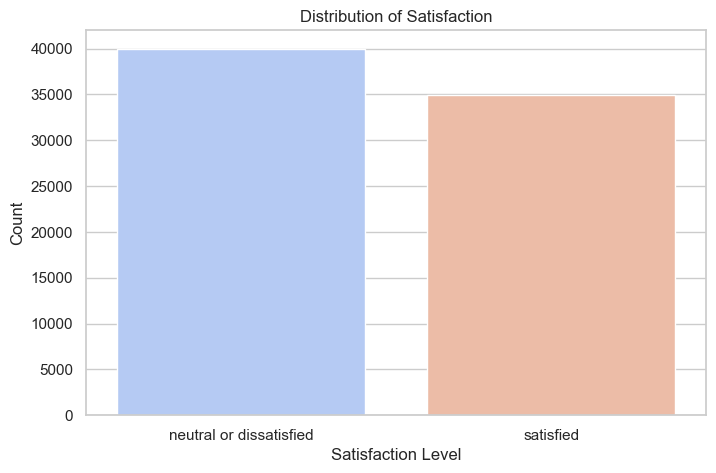

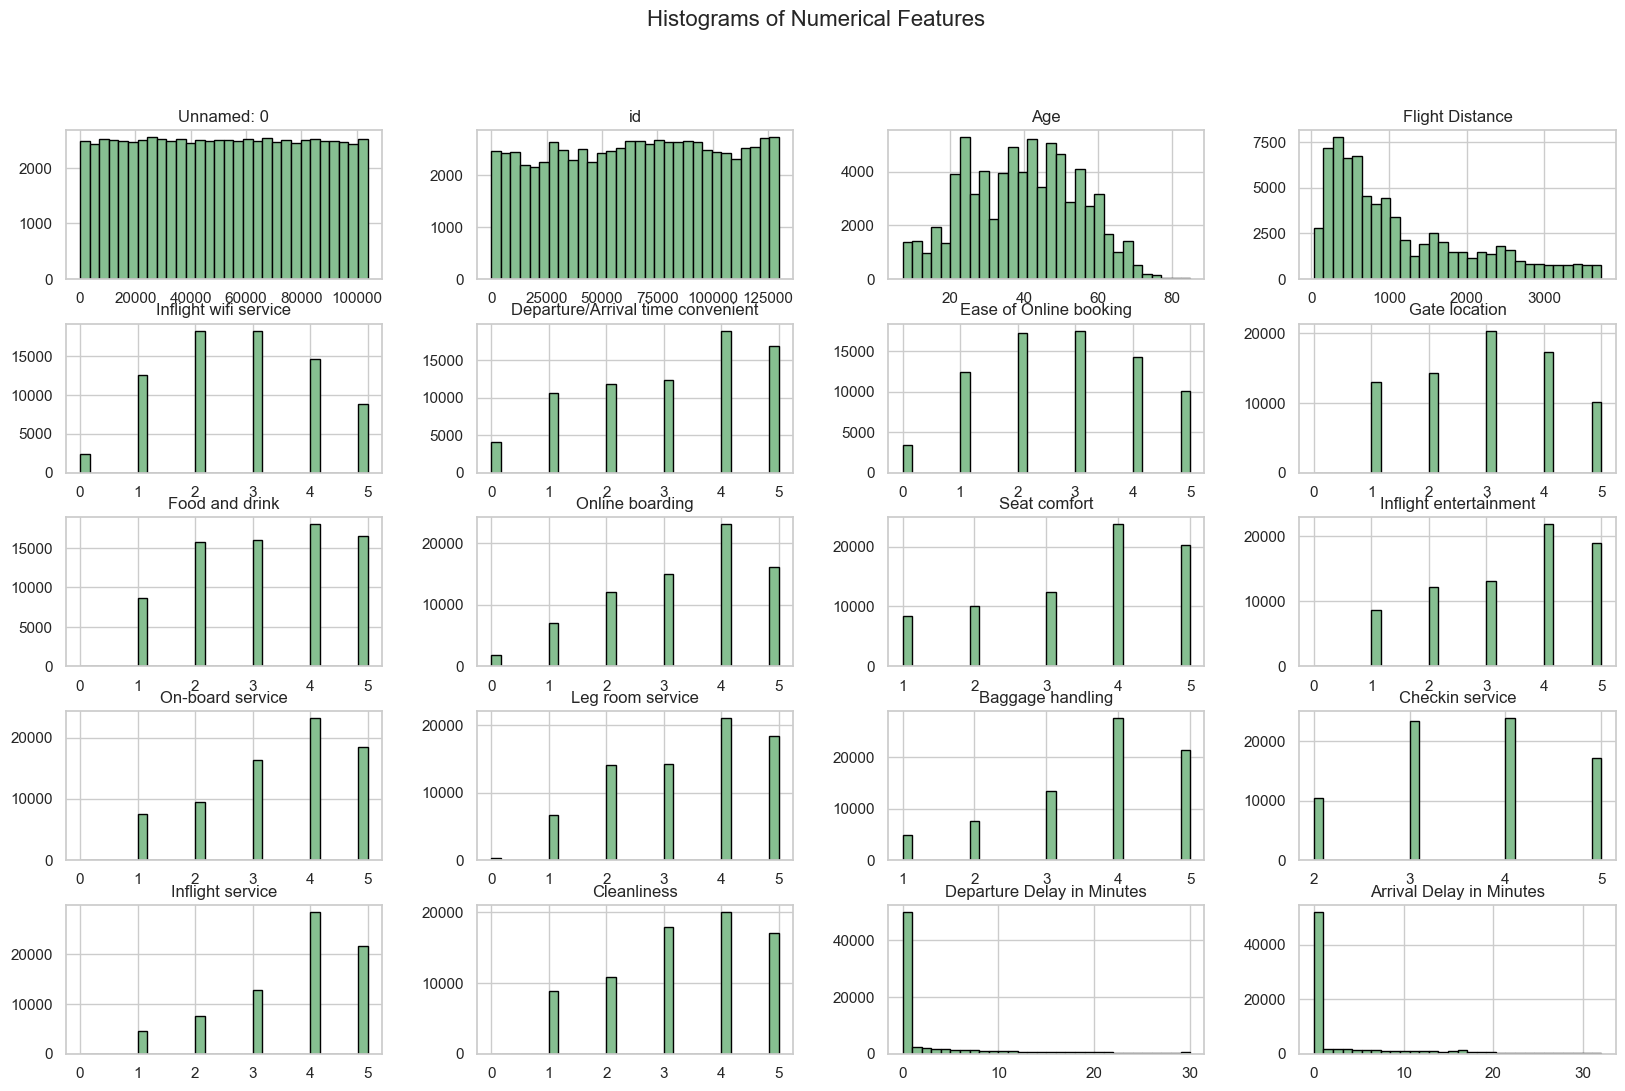

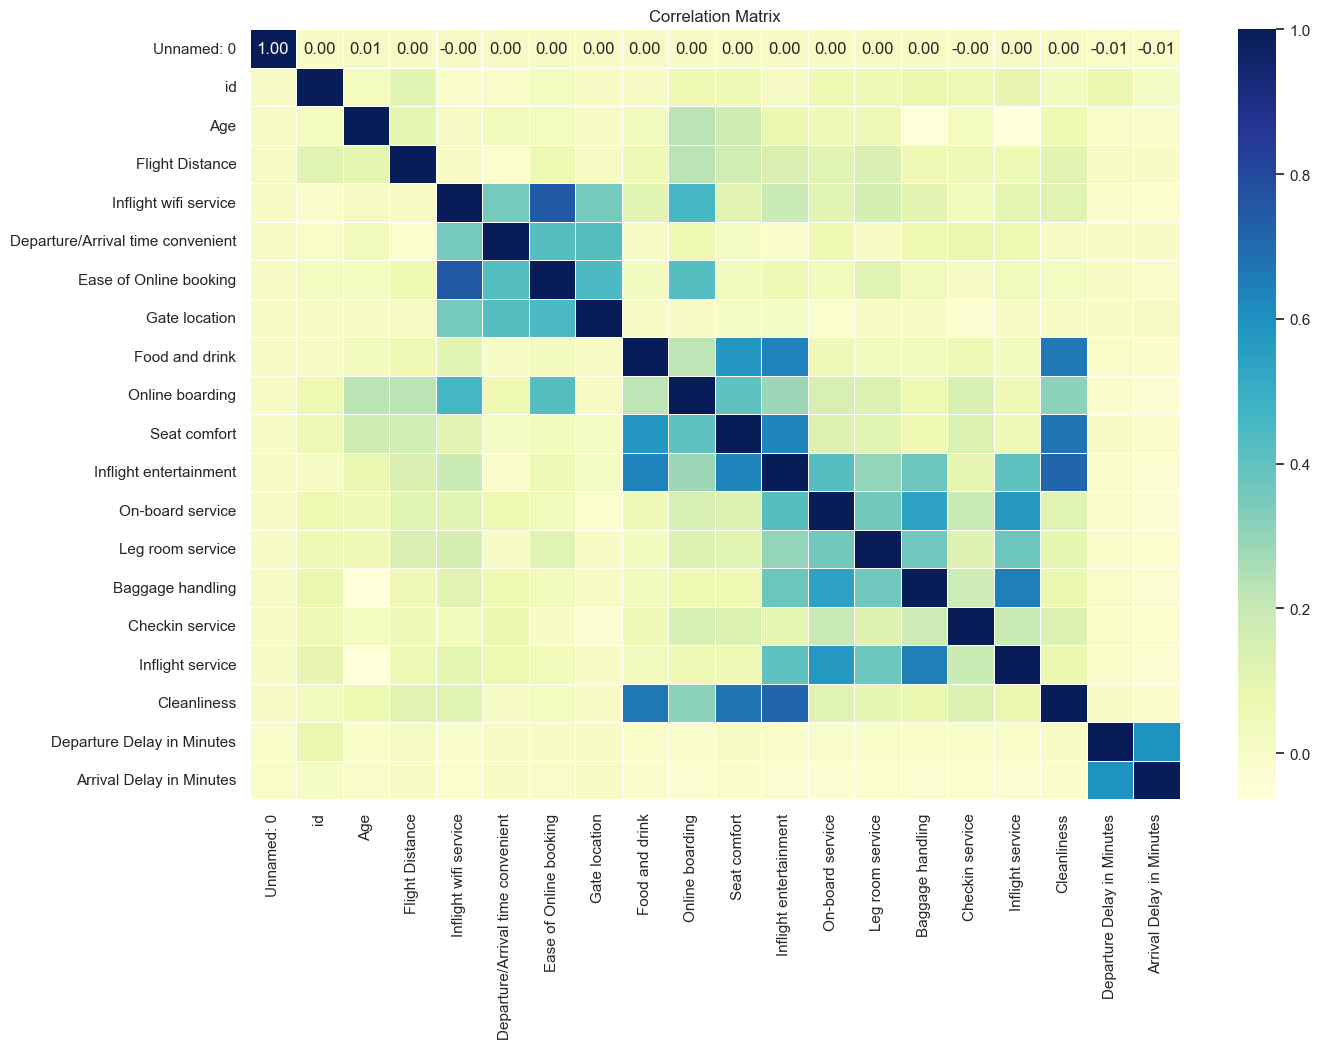

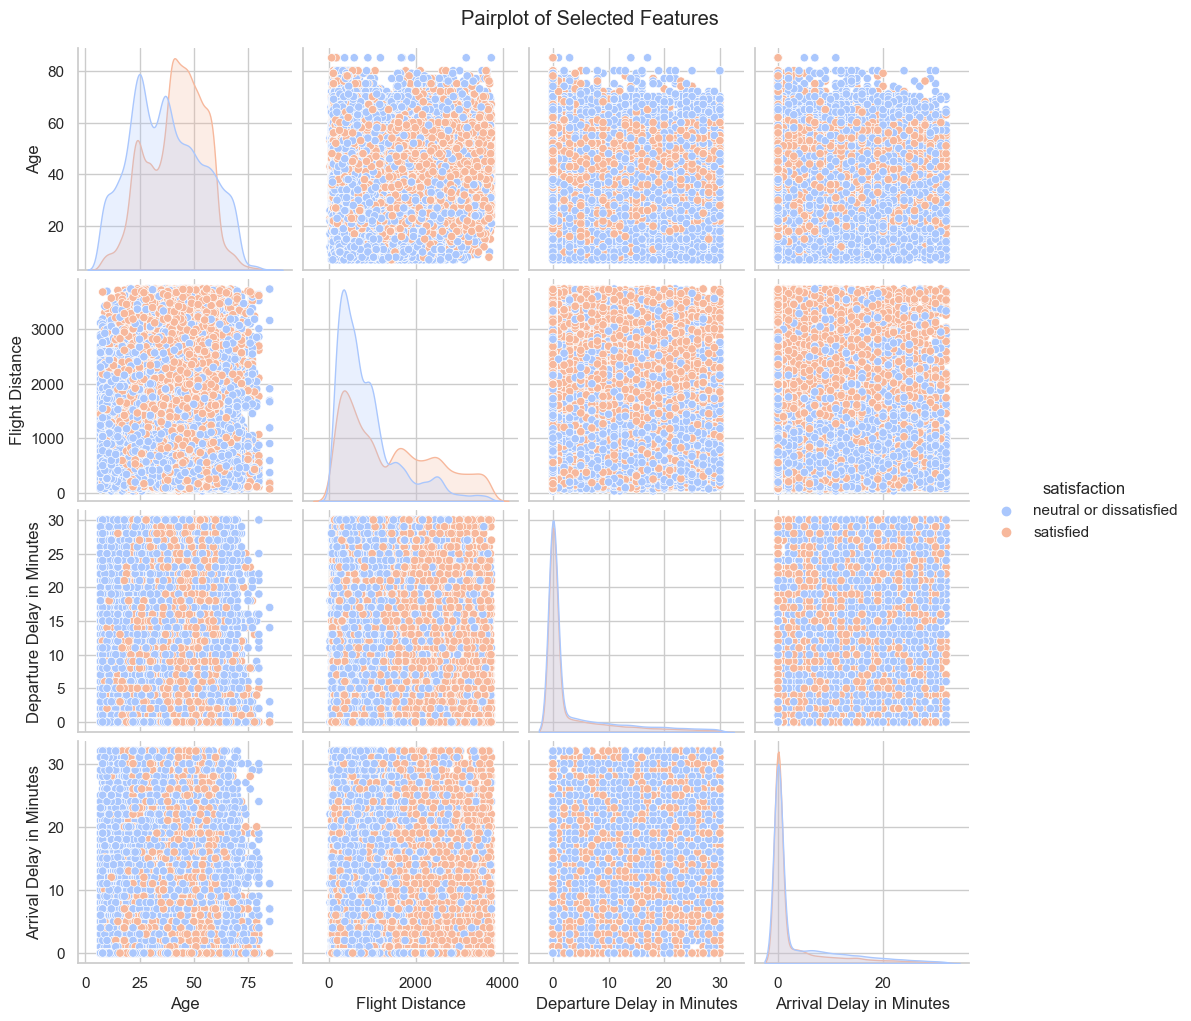

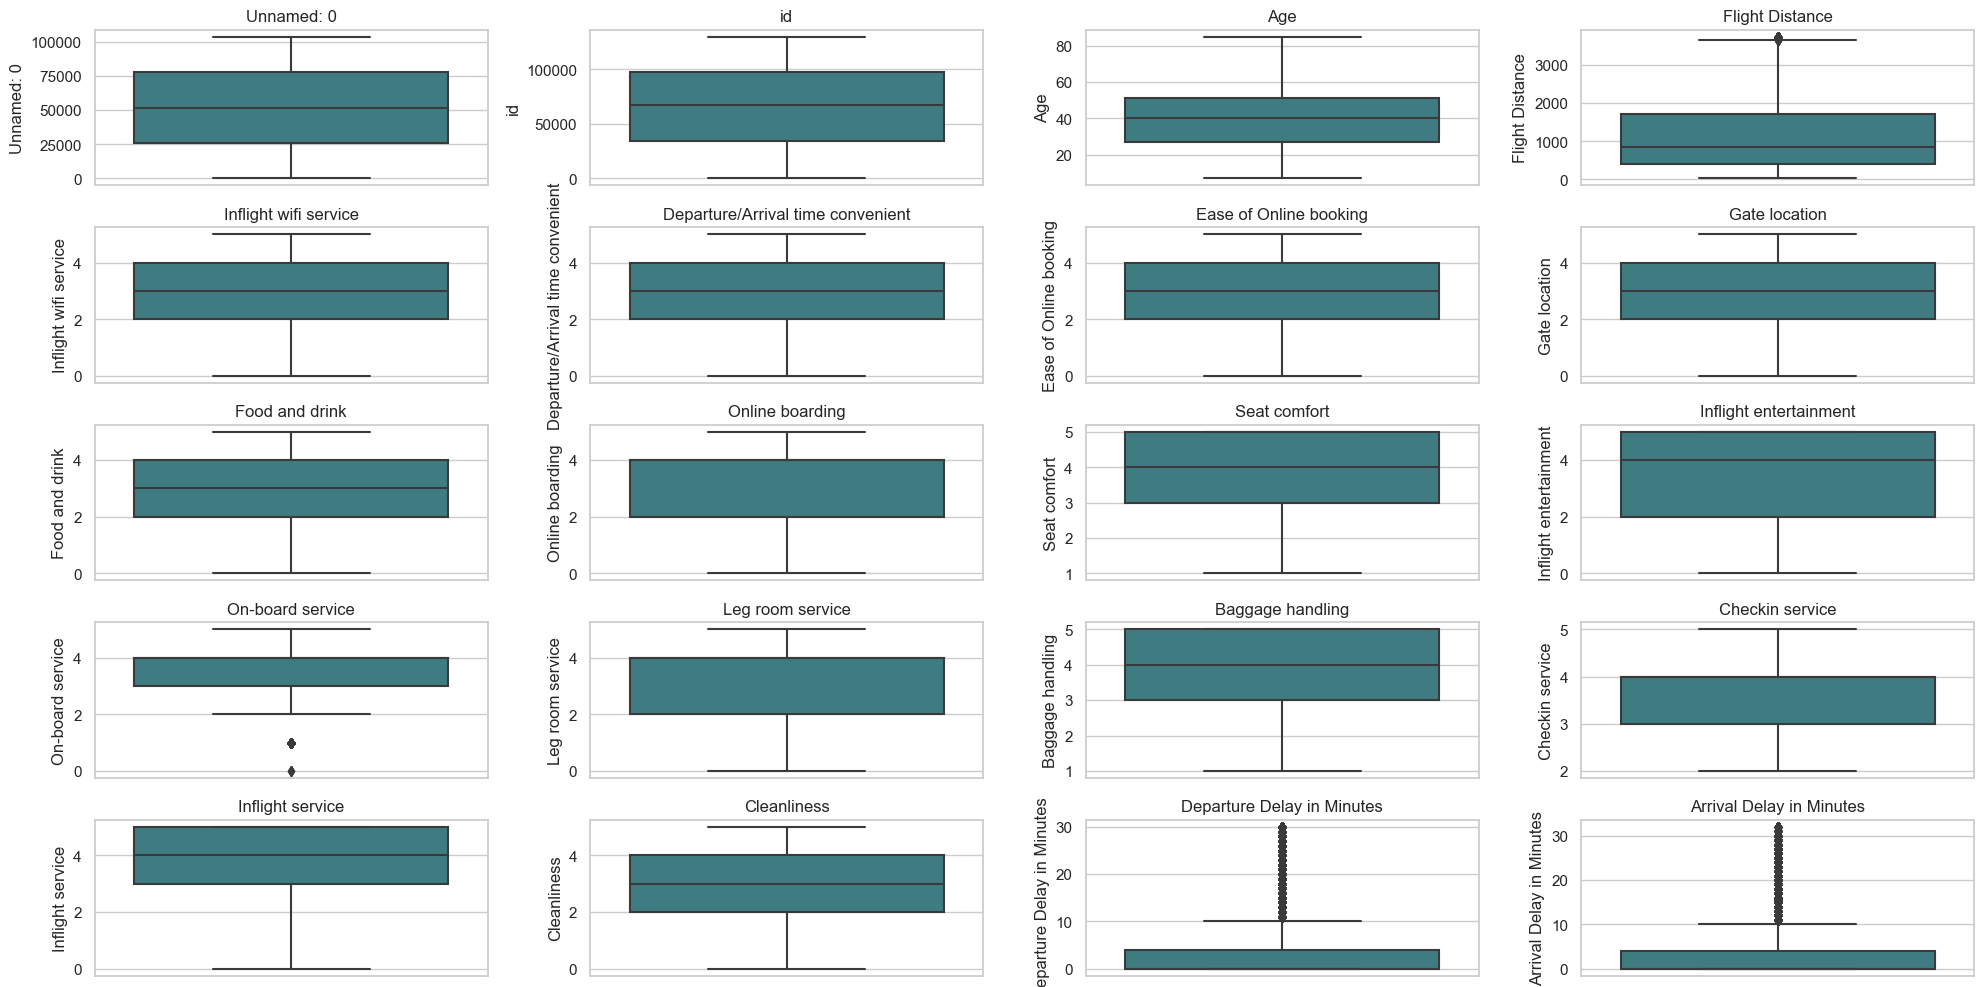

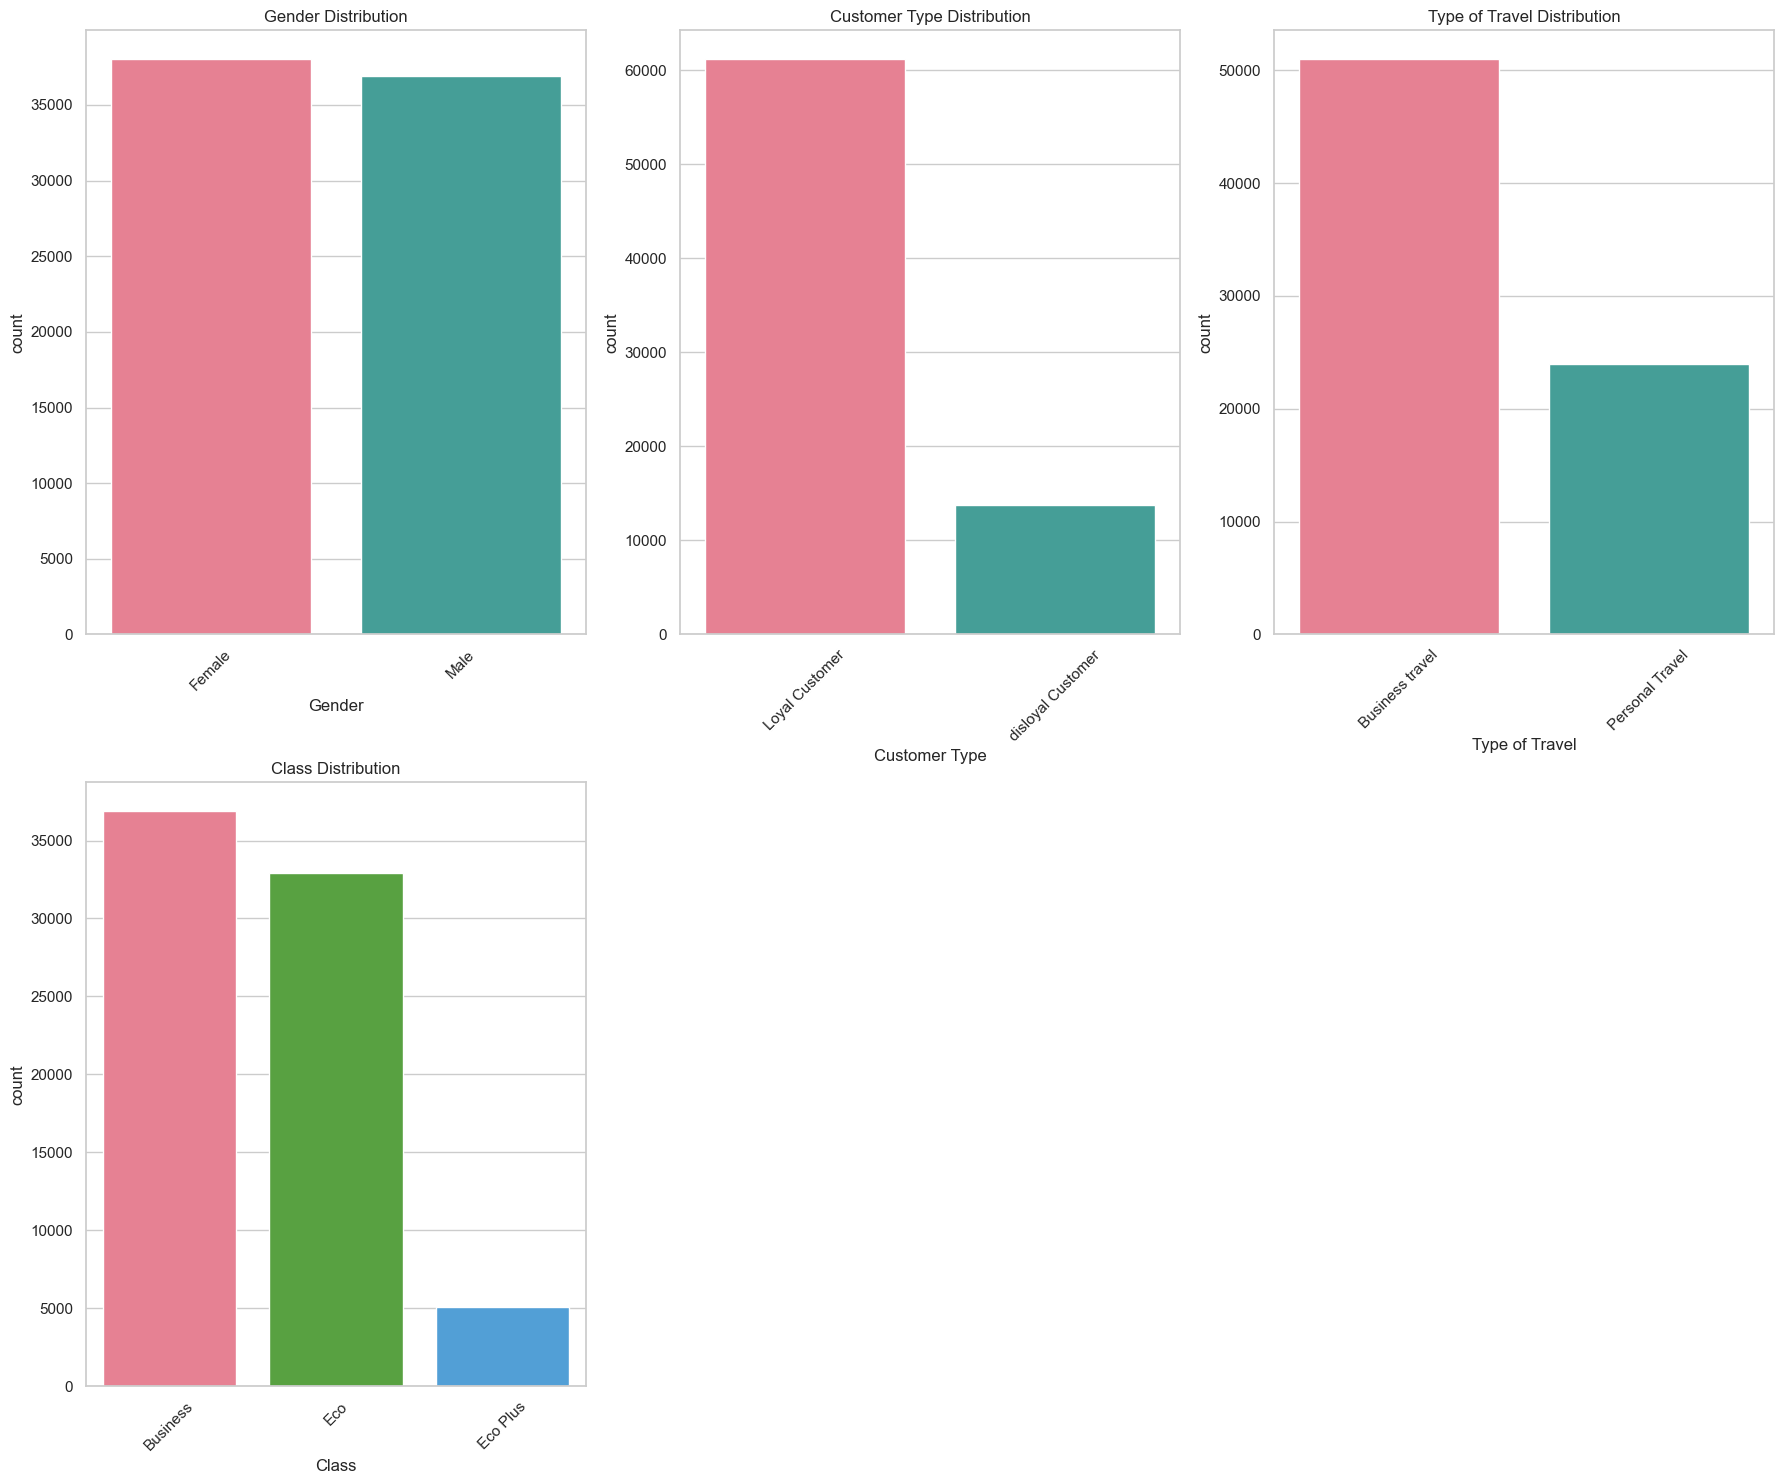

In [ ]:
# Visualizations
sns.set(style="whitegrid", palette="pastel")

# 1. Distribution of the target variable
plt.figure(figsize=(8, 5))
sns.countplot(x='satisfaction', data=df, palette='coolwarm')
plt.title('Distribution of Satisfaction')
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')
plt.show()

# 2. Histograms for numerical features
df[numeric_columns].hist(figsize=(20, 12), bins=30, edgecolor='black', color='#86bf91')
plt.suptitle('Histograms of Numerical Features', size=16)
plt.show()

# 3. Correlation matrix with a custom color map (numeric-only columns)
plt.figure(figsize=(15, 10))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# 4. Pairplot for selected features
selected_features = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction']
available_features = [col for col in selected_features if col in df.columns]
if available_features:
    sns.pairplot(df[available_features], hue='satisfaction', palette='coolwarm')
    plt.suptitle('Pairplot of Selected Features', y=1.02)
    plt.show()
else:
    print("Selected features for pairplot are not available.")

# 5. Boxplots for numerical features
plt.figure(figsize=(20, 12))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot((len(numeric_columns) // 4 + 1), 4, i)
    sns.boxplot(y=df[column], palette='crest')
    plt.title(column)
plt.tight_layout()
plt.show()

# 6. Bar plots for categorical features
categorical_columns = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(18, 15))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot((len(categorical_columns) // 3 + 1), 3, i)
    sns.countplot(x=df[column], order=df[column].value_counts().index, palette='husl')
    plt.title(f'{column} Distribution')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [ ]:
# Define hypothesis test function
def perform_hypothesis_testing(data1, data2, alpha=0.05):
    """
    Performs a two-sample t-test to compare the means of two independent samples.

    Parameters:
    - data1: First dataset (numpy array or list)
    - data2: Second dataset (numpy array or list)
    - alpha: Significance level (default 0.05)

    Returns:
    - Test statistic, p-value, and conclusion
    """
    t_stat, p_value = stats.ttest_ind(data1, data2, equal_var=False)

    if p_value < alpha:
        conclusion = "Reject the null hypothesis: There is a significant difference between the two samples."
    else:
        conclusion = "Fail to reject the null hypothesis: No significant difference found between the two samples."

    return t_stat, p_value, conclusion

# Example usage (replace with actual model results from project dataset)
# Assuming we are comparing model accuracies from two different algorithms
logistic_regression_acc = np.random.normal(87.66, 1.5, 100)  # Simulating accuracy values for Logistic Regression
random_forest_acc = np.random.normal(96.00, 1.2, 100)  # Simulating accuracy values for Random Forest

# Perform hypothesis test
t_stat, p_value, conclusion = perform_hypothesis_testing(logistic_regression_acc, random_forest_acc)

# Display results
t_stat, p_value, conclusion

(-43.59818704594841,
 1.051681472666977e-97,
 'Reject the null hypothesis: There is a significant difference between the two samples.')

Dataset Shape: (103904, 25)
   Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                 

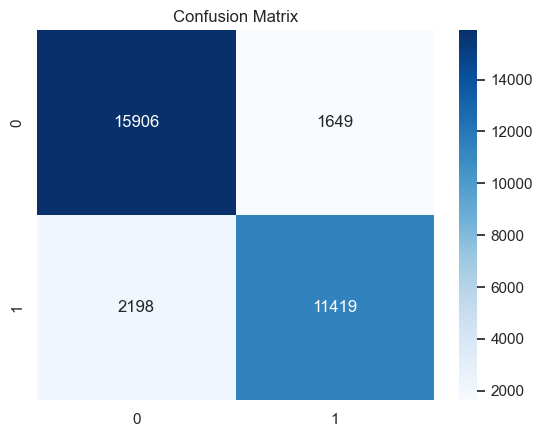


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89     17555
           1       0.87      0.84      0.86     13617

    accuracy                           0.88     31172
   macro avg       0.88      0.87      0.87     31172
weighted avg       0.88      0.88      0.88     31172


Model Accuracy: 87.66%


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned dataset
file_path = '/Users/Sayali/Desktop/ALY6140/Final_Project/train1.csv'
df = pd.read_csv(file_path)

# Display dataset information
print("Dataset Shape:", df.shape)
print(df.head())

# -------- Data Preprocessing --------

# 1. Encode target variable if it's categorical
if df['satisfaction'].dtype == 'object':
    df['satisfaction'] = LabelEncoder().fit_transform(df['satisfaction'])

# 2. Separate features and target
X = df.drop(['satisfaction'], axis=1)
y = df['satisfaction']

# 3. One-hot encode any remaining categorical columns
X = pd.get_dummies(X, drop_first=True)

# 4. Handle missing values with imputation
imputer = SimpleImputer(strategy='mean')  # or "median", "most_frequent", etc.
X_imputed = imputer.fit_transform(X)

# 5. Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# -------- Model Training --------

# Split the dataset (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    test_size=0.3,
                                                    random_state=42)

# Create and train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# -------- Model Evaluation --------

# Make predictions
y_pred = logistic_model.predict(X_test)

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")

satisfaction
Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')
'satisfaction' column exists!
Columns after encoding categorical variables:
Index(['Unnamed: 0', 'id', 'Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight servic

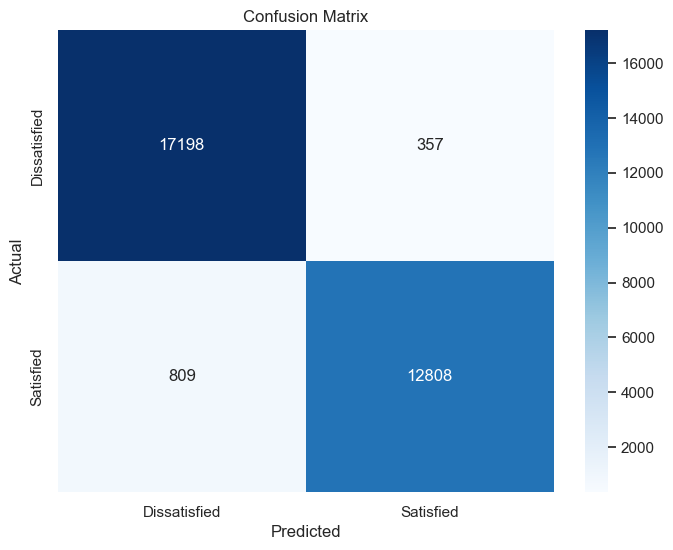

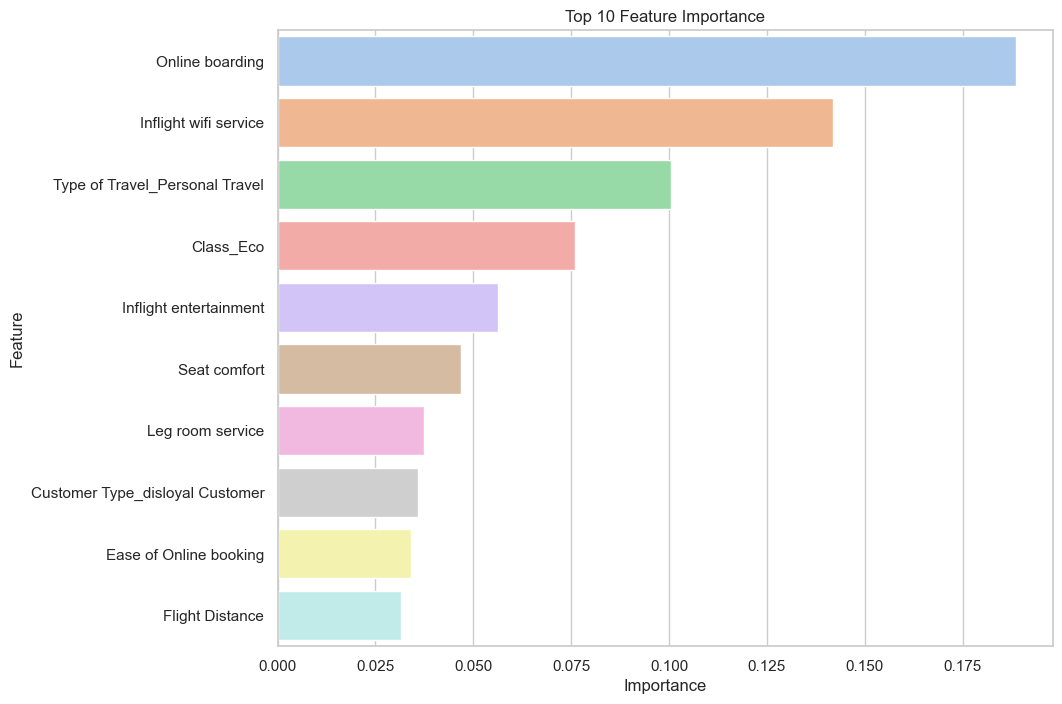

Feature Importance:
                            Feature  Importance
9                   Online boarding    0.188525
4             Inflight wifi service    0.141775
22   Type of Travel_Personal Travel    0.100410
23                        Class_Eco    0.075901
11           Inflight entertainment    0.056235
10                     Seat comfort    0.046780
13                 Leg room service    0.037296
21  Customer Type_disloyal Customer    0.035769
6            Ease of Online booking    0.034077
3                   Flight Distance    0.031616


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots are displayed inline in Jupyter Notebook
%matplotlib inline

# Load the dataset from a local CSV file
file_path ='/Users/Sayali/Desktop/ALY6140/Final_Project/train1.csv'
df = pd.read_csv(file_path)


# Check the column names to confirm the target column name
print("satisfaction")
print(df.columns)

# Clean column names by stripping any leading/trailing spaces
df.columns = df.columns.str.strip()

# Check again if 'satisfaction' exists after stripping spaces
if 'satisfaction' not in df.columns:
    print("The 'satisfaction' column is not found. Please check the column names and adjust the target.")
else:
    print("'satisfaction' column exists!")

# Handle missing values
# Fill missing values for numerical columns with their respective mean
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# Encode categorical variables (if any)
df = pd.get_dummies(df, drop_first=True)

# Check the columns after encoding categorical variables
print("Columns after encoding categorical variables:")
print(df.columns)

# Separate features (X) and target (y)
# Now the target column is 'satisfaction_satisfied' instead of 'satisfaction'
if 'satisfaction_satisfied' in df.columns:
    X = df.drop('satisfaction_satisfied', axis=1)  # Features
    y = df['satisfaction_satisfied']  # Target variable
else:
    print("Column 'satisfaction_satisfied' is missing. Please check and update the column name.")
    X, y = None, None  # In case satisfaction is missing

# If columns are correctly separated, continue with model training
if X is not None and y is not None:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize the Random Forest Classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

    # Train the model
    rf_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf_classifier.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    # Classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Dissatisfied', 'Satisfied'], yticklabels=['Dissatisfied', 'Satisfied'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Feature importance
    feature_importances = rf_classifier.feature_importances_
    feature_names = X.columns
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Plot feature importance
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
    plt.title('Top 10 Feature Importance')
    plt.show()

    # Display feature importance
    print("Feature Importance:")
    print(importance_df.head(10))


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset (Replace 'your_dataset.csv' with actual filename)
file_path ='/Users/Sayali/Desktop/ALY6140/Final_Project/train1.csv'
df = pd.read_csv(file_path)

# Identify the target column (Replace 'target_column' with actual target variable name)
target_column = "satisfaction"  # Change this to match your dataset

# Drop rows where the target column is missing (we cannot train on missing labels)
df = df.dropna(subset=[target_column])

# Encode the target variable (Fixes XGBoost error)
label_encoder_y = LabelEncoder()
df[target_column] = label_encoder_y.fit_transform(df[target_column])

# Separate features and target variable
X = df.drop(columns=[target_column])
y = df[target_column]

# Identify categorical columns in features
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply label encoding for categorical variables
label_encoders_X = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders_X[col] = le  # Store encoders for inverse transformation if needed

# Handle missing values in features using SimpleImputer
imputer = SimpleImputer(strategy="mean")
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42, stratify=y)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Gradient Boosting Classifier**
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_gb = gb_model.predict(X_test_scaled)

# Performance
print("\n🔹 Gradient Boosting Classifier Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\n🔹 Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))

### **XGBoost Classifier**
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Performance
print("\n🔹 XGBoost Classifier Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\n🔹 XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))



🔹 Gradient Boosting Classifier Accuracy: 0.9447572301621674

🔹 Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95     11776
           1       0.94      0.93      0.94      9005

    accuracy                           0.94     20781
   macro avg       0.94      0.94      0.94     20781
weighted avg       0.94      0.94      0.94     20781


🔹 XGBoost Classifier Accuracy: 0.9423511861796834

🔹 XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     11776
           1       0.94      0.92      0.93      9005

    accuracy                           0.94     20781
   macro avg       0.94      0.94      0.94     20781
weighted avg       0.94      0.94      0.94     20781



/Users/trupalchaudhari/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:38:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



🔹 Gradient Boosting Classifier Accuracy: 0.9447572301621674

🔹 Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95     11776
           1       0.94      0.93      0.94      9005

    accuracy                           0.94     20781
   macro avg       0.94      0.94      0.94     20781
weighted avg       0.94      0.94      0.94     20781



/Users/trupalchaudhari/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:11:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



🔹 XGBoost Classifier Accuracy: 0.9423511861796834

🔹 XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     11776
           1       0.94      0.92      0.93      9005

    accuracy                           0.94     20781
   macro avg       0.94      0.94      0.94     20781
weighted avg       0.94      0.94      0.94     20781



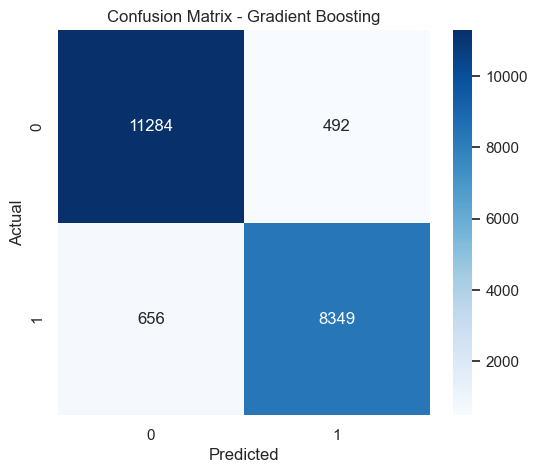

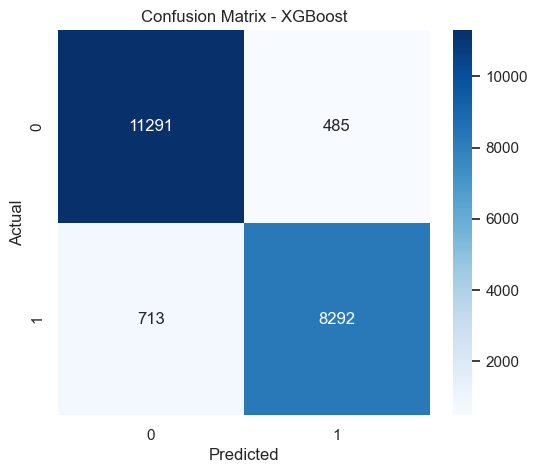

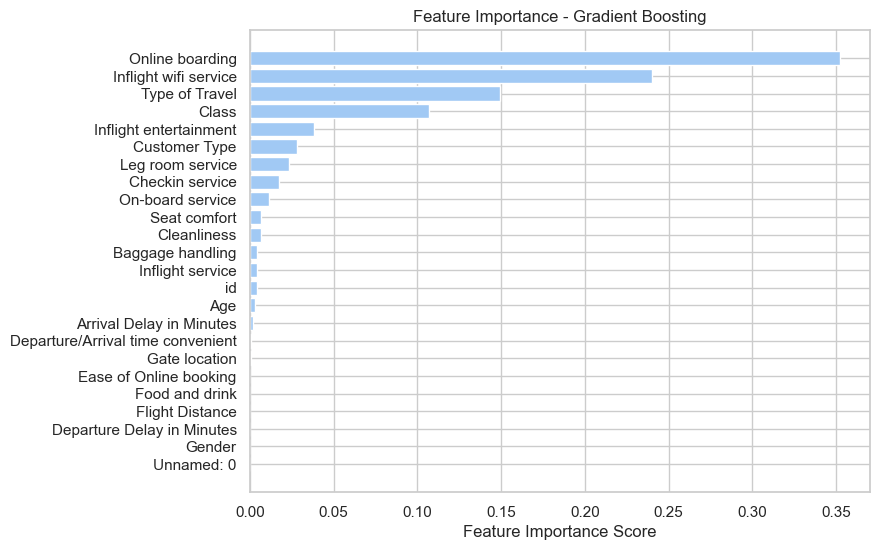

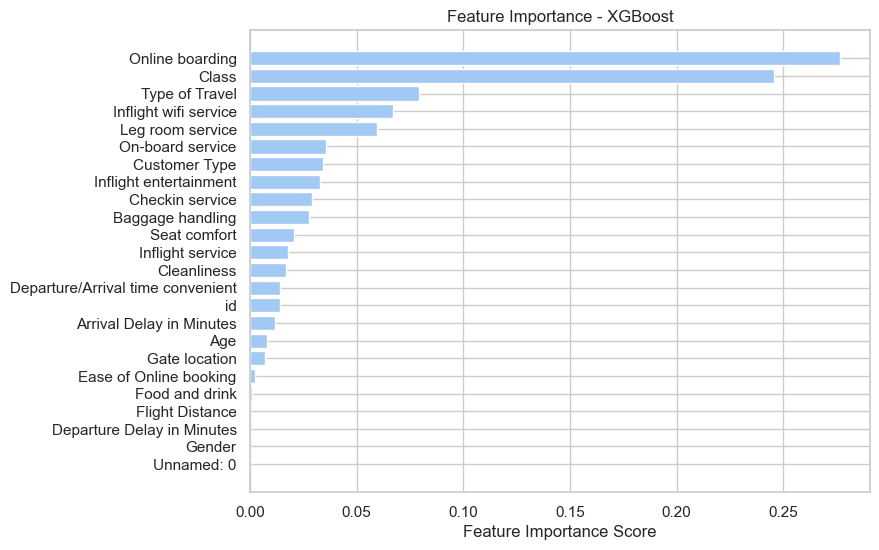

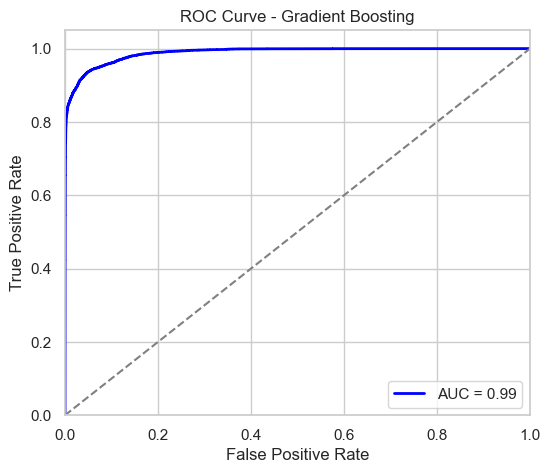

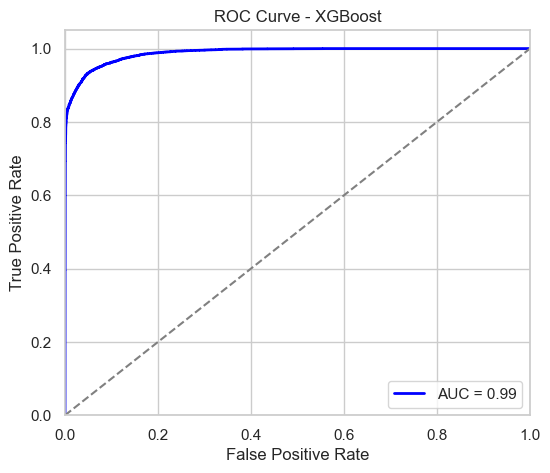

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

file_path ='/Users/Sayali/Desktop/ALY6140/Final_Project/train1.csv'
df = pd.read_csv(file_path)

target_column = "satisfaction"

df = df.dropna(subset=[target_column])

# Convert the target column to numerical labels (Fixing XGBoost error)
label_encoder_y = LabelEncoder()
df[target_column] = label_encoder_y.fit_transform(df[target_column])

# Separate features and target variable
X = df.drop(columns=[target_column])
y = df[target_column]

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply label encoding for categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))  # Convert categorical text into numerical labels
    label_encoders[col] = le  # Store encoders for potential inverse transformation

# Handle missing values in the features using SimpleImputer
imputer = SimpleImputer(strategy="mean")
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Gradient Boosting Classifier**
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_gb = gb_model.predict(X_test_scaled)

# Performance
print("\n🔹 Gradient Boosting Classifier Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\n🔹 Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))

### **XGBoost Classifier (Now Fixed)**
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_scaled, y_train)  # ✅ Now `y_train` is numeric, fixing the error

# Predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Performance
print("\n🔹 XGBoost Classifier Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\n🔹 XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

# ---- VISUALIZATION ---- #

# 📌 **Confusion Matrix for Both Models**
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, y_pred_gb, "Confusion Matrix - Gradient Boosting")
plot_confusion_matrix(y_test, y_pred_xgb, "Confusion Matrix - XGBoost")

# 📌 **Feature Importance Plot**
def plot_feature_importance(model, title, feature_names):
    importance = model.feature_importances_
    sorted_idx = np.argsort(importance)
    plt.figure(figsize=(8, 6))
    plt.barh(range(len(sorted_idx)), importance[sorted_idx], align="center")
    plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx])
    plt.xlabel("Feature Importance Score")
    plt.title(title)
    plt.show()

plot_feature_importance(gb_model, "Feature Importance - Gradient Boosting", X.columns)
plot_feature_importance(xgb_model, "Feature Importance - XGBoost", X.columns)

# 📌 **ROC Curve for Both Models**
def plot_roc_curve(y_true, y_pred_prob, title):
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color="blue", lw=2, label="AUC = {:.2f}".format(roc_auc))
    plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

# Get probability scores for ROC Curve (Gradient Boosting)
y_pred_prob_gb = gb_model.predict_proba(X_test_scaled)[:, 1]
y_pred_prob_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

plot_roc_curve(y_test, y_pred_prob_gb, "ROC Curve - Gradient Boosting")
plot_roc_curve(y_test, y_pred_prob_xgb, "ROC Curve - XGBoost")


                 Model  Accuracy  Precision (Class 0)  Precision (Class 1)  \
0  Logistic Regression     87.66                 0.88                 0.87   
1        Random Forest     96.00                 0.96                 0.97   
2    Gradient Boosting     94.48                 0.95                 0.94   
3              XGBoost     94.24                 0.94                 0.94   

   Recall (Class 0)  Recall (Class 1)  F1-Score (Class 0)  F1-Score (Class 1)  
0              0.91              0.84                0.89                0.86  
1              0.98              0.94                0.97                0.96  
2              0.96              0.93                0.95                0.94  
3              0.96              0.92                0.95                0.93  


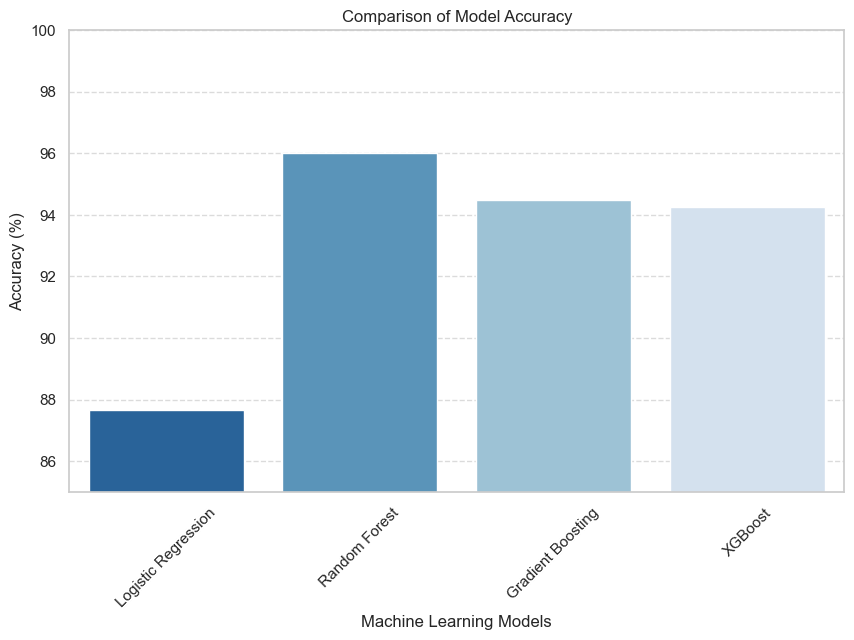

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Model performance data
model_data = {
    "Model": ["Logistic Regression", "Random Forest", "Gradient Boosting", "XGBoost"],
    "Accuracy": [87.66, 96.00, 94.48, 94.24],
    "Precision (Class 0)": [0.88, 0.96, 0.95, 0.94],
    "Precision (Class 1)": [0.87, 0.97, 0.94, 0.94],
    "Recall (Class 0)": [0.91, 0.98, 0.96, 0.96],
    "Recall (Class 1)": [0.84, 0.94, 0.93, 0.92],
    "F1-Score (Class 0)": [0.89, 0.97, 0.95, 0.95],
    "F1-Score (Class 1)": [0.86, 0.96, 0.94, 0.93],
}

# Convert to DataFrame
df_models = pd.DataFrame(model_data)

# Display DataFrame in Jupyter Notebook
print(df_models)  # Use this if you are running in a standard Python script
# display(df_models)  # Uncomment this line if running in Jupyter Notebook

# Plot model accuracy comparison
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Accuracy", data=df_models, palette="Blues_r")
plt.ylim(85, 100)
plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy (%)")
plt.title("Comparison of Model Accuracy")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
